# 1. Setup and Get Data

In [8]:
import os 
import time
import uuid
import cv2

In [2]:
# IMAGES_PATH = os.path.join('data','images')
# number_images = 30


In [3]:
# # cap = cv2.VideoCapture(1)
# # number_images = 30 # Số hình ảnh bạn muốn thu thập
# # image_folder = "E:\Self Deep Learning\Project\Face_Detection_Model\data\images"  # Thay đổi đường dẫn đến thư mục lưu ảnh của bạn

# # for imgnum in range(number_images):
# #     print('Collecting image {}'.format(imgnum))
    
# #     # Đọc frame từ camera
# #     ret, frame = cap.read()
    
# #     # Tạo tên và đường dẫn tới file ảnh
# #     imgname = os.path.join(image_folder, f'{str(uuid.uuid1())}.jpg')
    
# #     # Ghi frame thành file ảnh
# #     cv2.imwrite(imgname, frame)
      
# #     # Hiển thị frame
# #     cv2.imshow('frame', frame)
    
# #     # Chờ 0.5 giây
# #     cv2.waitKey(500)
    
# #     # Thoát vòng lặp khi nhấn 'q'
# #     if cv2.waitKey(1) == ord('q'):
# #         break

# # cap.release()
# # cv2.destroyAllWindows()


# import cv2
# import os
# import time

# def capture_images(folder_path, num_images):
#     # Create a new folder to store the captured images
#     if not os.path.exists(folder_path):
#         os.mkdir(folder_path)

#     # Open the camera
#     camera = cv2.VideoCapture(0)

#     # Start capturing images
#     image_count = 0
#     while image_count < num_images:
#         # Capture an image
#         ret, frame = camera.read()

#         # Display the image in a window
#         cv2.imshow("Capture Images", frame)

#         # Save the captured image
#         image_filename = os.path.join(folder_path, f"image_{image_count}.jpg")
#         cv2.imwrite(image_filename, frame)

#         image_count += 1
#         time.sleep(0.5)
#         # Delay for a few milliseconds
#         cv2.waitKey(200)  # Adjust the delay time (in milliseconds) between images

#     # Release the camera
#     camera.release()

#     # Close all OpenCV windows
#     cv2.destroyAllWindows()

# if __name__ == "__main__":
#     # Specify the folder path to store the captured images
#     folder_path = "E:\Self Deep Learning\Project\Face_Detection_Model\data\images"

#     # Specify the number of images to capture
#     num_images = 90

#     # Run the capture_images function
#     capture_images(folder_path, num_images)

In [7]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

In [29]:
images = tf.data.Dataset.list_files('data\\images\*.jpg')


In [30]:
images.as_numpy_iterator().next()

b'data\\images\\image_10.jpg'

In [31]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [32]:
images = images.map(load_image)

In [33]:
images.as_numpy_iterator().next()

array([[[172, 162, 160],
        [172, 162, 160],
        [171, 161, 159],
        ...,
        [194, 186, 183],
        [194, 186, 183],
        [195, 187, 184]],

       [[172, 162, 160],
        [171, 161, 159],
        [171, 161, 159],
        ...,
        [194, 186, 183],
        [193, 185, 182],
        [194, 186, 183]],

       [[171, 163, 160],
        [170, 162, 159],
        [169, 161, 158],
        ...,
        [194, 186, 183],
        [193, 185, 182],
        [193, 185, 182]],

       ...,

       [[139, 130, 123],
        [140, 131, 124],
        [140, 131, 124],
        ...,
        [131, 124, 114],
        [135, 128, 118],
        [135, 128, 118]],

       [[139, 130, 123],
        [140, 131, 124],
        [140, 131, 124],
        ...,
        [131, 122, 115],
        [135, 128, 118],
        [135, 128, 118]],

       [[139, 130, 123],
        [140, 131, 124],
        [140, 131, 124],
        ...,
        [129, 120, 113],
        [135, 128, 118],
        [135, 128, 118]]

In [34]:
image_generator = images.batch(4).as_numpy_iterator()

In [40]:
plot_images = image_generator.next()

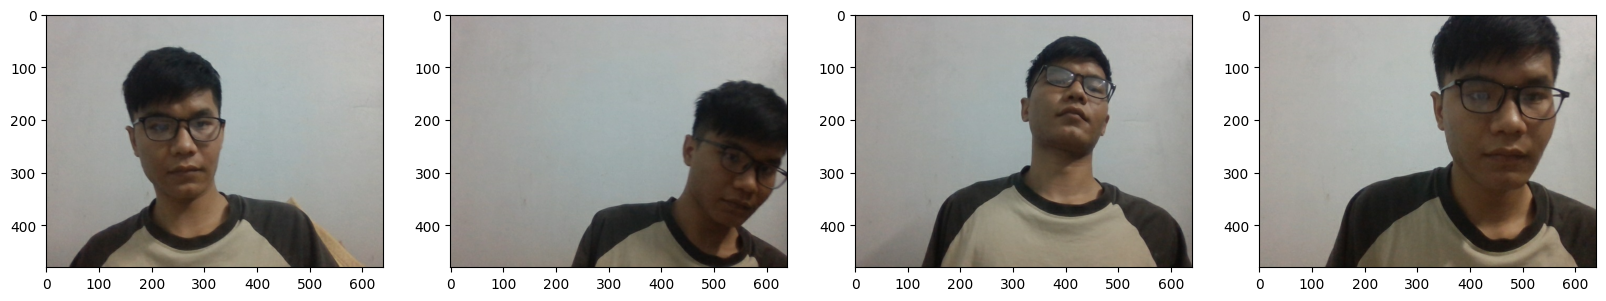

In [41]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

# 3. Partition Unaugmented Data

In [42]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

# 4. Apply Image Augumentation on Images and Labels using Albumentations

In [46]:
import albumentations as alb

In [47]:
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params=alb.BboxParams(format='albumentations',
                                                    label_fields=['class_labels']))

In [48]:
img = cv2.imread(os.path.join('data','train','images','image_0.jpg'))

In [51]:
with open(os.path.join('data','train','labels','image_0.json'),'r') as f:
    label = json.load(f)

In [53]:
label

{'version': '5.3.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[207.43016759776535, 86.927374301676],
    [427.5418994413408, 378.5474860335196]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\image_0.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVl

In [54]:
coords = [0,0,0,0]
coords[0]= label['shapes'][0]['points'][0][0]
coords[1]= label['shapes'][0]['points'][0][1]
coords[2]= label['shapes'][0]['points'][1][0]
coords[3]= label['shapes'][0]['points'][1][1]

In [55]:
coords

[207.43016759776535, 86.927374301676, 427.5418994413408, 378.5474860335196]

In [56]:
coords = list(np.divide(coords,[640,480,640,480]))

In [57]:
coords

[0.32410963687150834,
 0.181098696461825,
 0.6680342178770949,
 0.7886405959031658]

In [63]:
augmented = augmentor(image= img, bboxes = [coords], class_labels = ['face'])

In [65]:
augmented['bboxes']

[(0.3120670391061452,
  0.1709497206703911,
  0.8012042209807573,
  0.8189944134078213)]

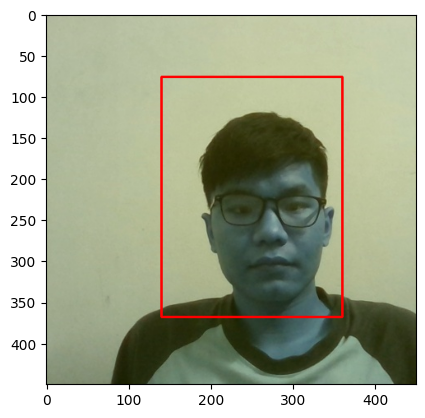

In [69]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
              (255,0,0),2)
plt.imshow(augmented['image'])

# 5.Run Augmentation Pipeline


In [71]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

## 5.2 Load Augmented Images to Tensorflow Dataset

In [72]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x,(120,120)))
train_images = train_images.map(lambda x: x/255)

In [73]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x,(120,120)))
test_images = test_images.map(lambda x: x/255)

In [74]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images = val_images.map(lambda x: x/255)

# 6. Prepare Labels

In [75]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as f:
        label = json.load(f)

    return [label['class']], label['bbox']

##### Load Label to Tensorflow Dataset

In [77]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle= False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

In [79]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle= False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

In [80]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle= False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

# 7. Combine Label and Image Samples

In [81]:
len(train_images), len(train_labels), len(test_images),len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [82]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [83]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [85]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [86]:
data_samples = train.as_numpy_iterator()


In [89]:
res = data_samples.next()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


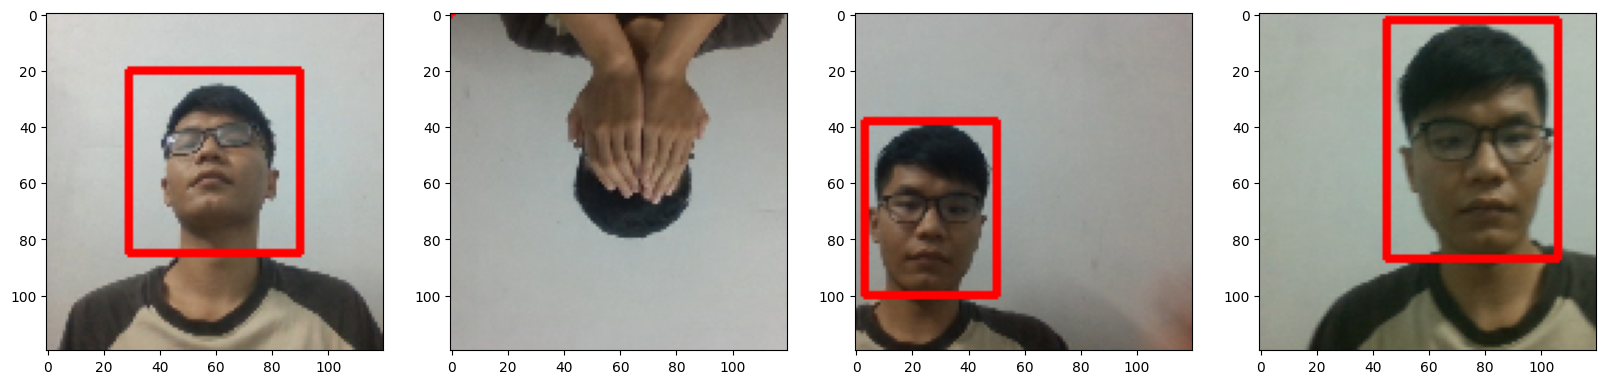

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

In [91]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten,Add, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [92]:
vgg = VGG16(include_top=False)


58889256/58889256 [==============================] - 6s 0us/step


In [93]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [94]:
def build_model():
    input_layer = Input(shape = (120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation = 'relu')(f1)
    class2 = Dense(1, activation = 'sigmoid')(class1)

    f2= GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation = 'relu')(f2)
    regress2 = Dense(4, activation = 'sigmoid')(regress1)

    facetracker = Model(inputs = input_layer, outputs = [class2,regress2])
    return facetracker

In [95]:
facetracker = build_model()

In [96]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [97]:
X, y= train.as_numpy_iterator().next()

In [100]:
X.shape

(8, 120, 120, 3)

In [101]:
classes , coords = facetracker.predict(X)

1/1 [==============================] - 2s 2s/step


In [102]:
classes,coords

(array([[0.4133762 ],
        [0.3673778 ],
        [0.37621114],
        [0.41784003],
        [0.3894488 ],
        [0.30837318],
        [0.3610494 ],
        [0.41900706]], dtype=float32),
 array([[0.6269143 , 0.39212593, 0.29083645, 0.5062913 ],
        [0.595514  , 0.42549735, 0.23976062, 0.4709239 ],
        [0.54948276, 0.39238378, 0.35381126, 0.49701443],
        [0.5846518 , 0.43158403, 0.31788707, 0.541434  ],
        [0.6054495 , 0.4129939 , 0.2454023 , 0.5045434 ],
        [0.46628323, 0.4726549 , 0.33889374, 0.60705066],
        [0.5554442 , 0.41524932, 0.27545974, 0.5251389 ],
        [0.5363672 , 0.38837555, 0.40379646, 0.5649659 ]], dtype=float32))

# 9. Define Losses and Optimizers

In [103]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [105]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)


In [106]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [107]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [108]:
localization_loss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=8.156088>

In [109]:
classloss(y[0], classes)


<tf.Tensor: shape=(), dtype=float32, numpy=0.9678871>

In [110]:
regressloss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=8.156088>

# 10. Train Neural Network

In [111]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [112]:
model = FaceTracker(facetracker)


In [115]:
model.compile(opt, classloss, regressloss)

In [117]:
hist = model.fit(train, epochs=10, validation_data=val)


Epoch 1/10
473/473 [==============================] - 1291s 3s/step - total_loss: 0.3332 - class_loss: 0.0797 - regress_loss: 0.2933 - val_total_loss: 0.0167 - val_class_loss: 5.3394e-05 - val_regress_loss: 0.0166
Epoch 2/10
473/473 [==============================] - 1257s 3s/step - total_loss: 0.1105 - class_loss: 0.0319 - regress_loss: 0.0945 - val_total_loss: 0.0147 - val_class_loss: 7.3761e-06 - val_regress_loss: 0.0147
Epoch 3/10
473/473 [==============================] - 1375s 3s/step - total_loss: 0.0714 - class_loss: 0.0206 - regress_loss: 0.0611 - val_total_loss: 0.0214 - val_class_loss: 5.2886e-05 - val_regress_loss: 0.0213
Epoch 4/10
473/473 [==============================] - 1396s 3s/step - total_loss: 0.0593 - class_loss: 0.0167 - regress_loss: 0.0509 - val_total_loss: 0.0158 - val_class_loss: 1.1412e-04 - val_regress_loss: 0.0158
Epoch 5/10
473/473 [==============================] - 1375s 3s/step - total_loss: 0.0488 - class_loss: 0.0148 - regress_loss: 0.0414 - val_total

In [118]:
hist.history

{'total_loss': [0.010182484053075314,
  0.00868897419422865,
  0.014612455852329731,
  0.006990759167820215,
  0.0055511402897536755,
  0.002443114062771201,
  0.005707630421966314,
  0.0058993985876441,
  0.001959884073585272,
  0.007134520448744297],
 'class_loss': [6.386946188285947e-05,
  4.641911800717935e-05,
  7.573398761451244e-05,
  0.000562657427508384,
  2.707595740503166e-05,
  0.0005133716622367501,
  0.0007712183869443834,
  8.62783781485632e-06,
  0.0001754116965457797,
  3.32298077410087e-06],
 'regress_loss': [0.010150549001991749,
  0.008665764704346657,
  0.01457458920776844,
  0.006709430366754532,
  0.0055376021191477776,
  0.002186428289860487,
  0.005322021432220936,
  0.005895084701478481,
  0.001872178167104721,
  0.007132858969271183],
 'val_total_loss': [0.0166644100099802,
  0.01470932550728321,
  0.02135850489139557,
  0.01583237200975418,
  0.01355704851448536,
  0.009120816364884377,
  0.020871389657258987,
  0.008947094902396202,
  0.013537769205868244,


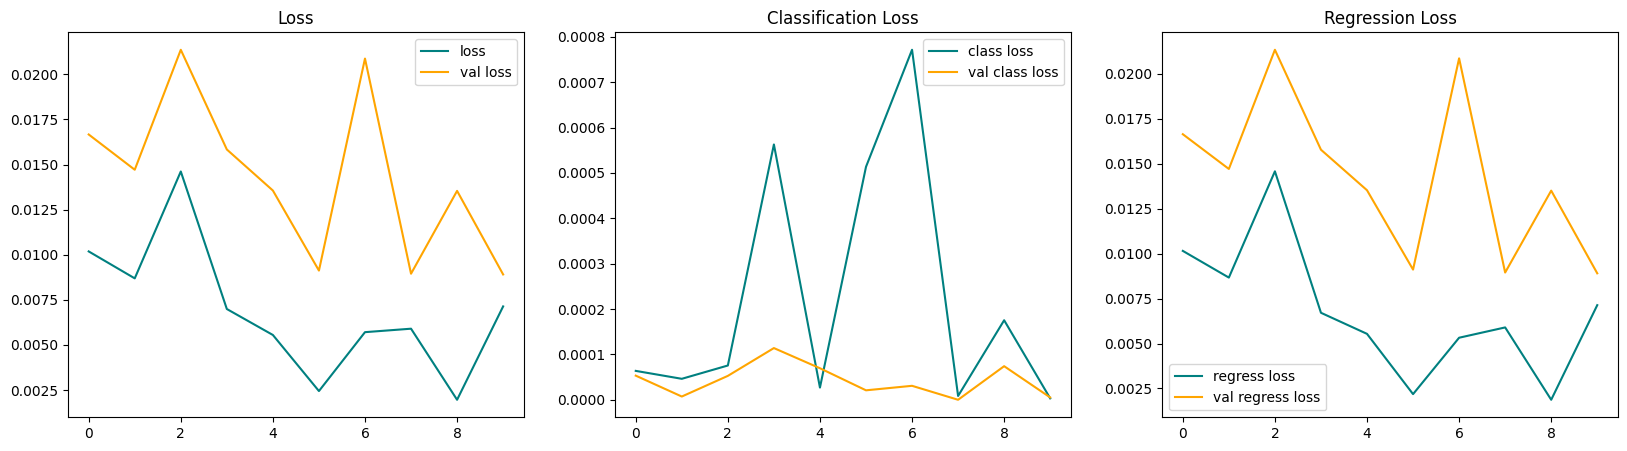

In [119]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

In [120]:
test_data = test.as_numpy_iterator()

In [136]:
test_sample = test_data.next()


In [137]:
yhat = facetracker.predict(test_sample[0])


1/1 [==============================] - 1s 569ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


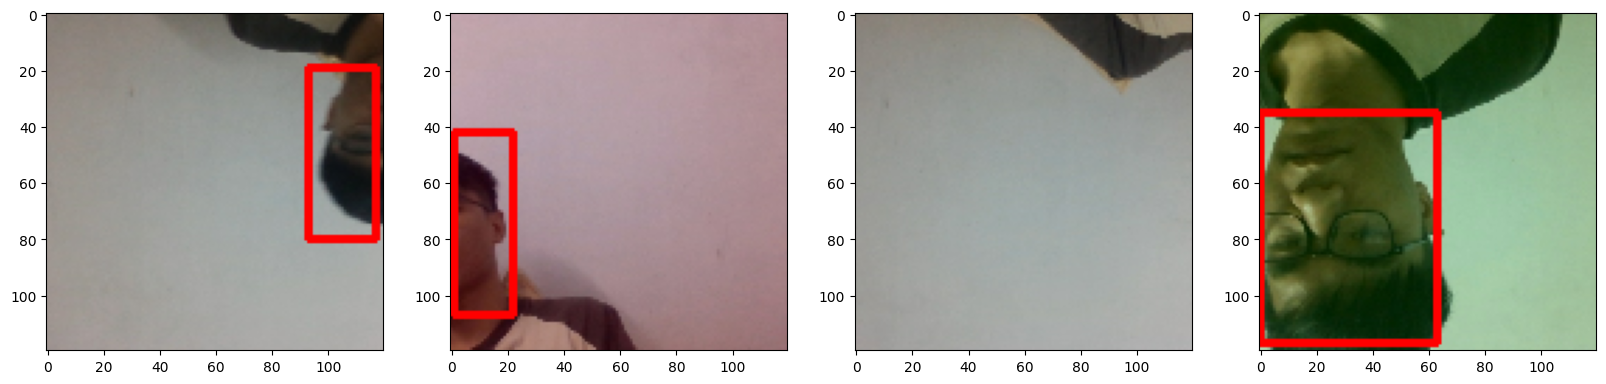

In [138]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [124]:
from tensorflow.keras.models import load_model


In [125]:
facetracker.save('facetracker.h5')


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [126]:
facetracker = load_model('facetracker.h5')


In [144]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
 